# Project Background
The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

The goal of the project is to accurately predict the likelihood of a new patient having heart disease in the future. 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline

EDA: Descriptive Statistics
We will start with exploring our dataset. As per the source, each patient has the following information collected about them:

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

## Read data
Read the data and get a general idea about the data

In [2]:
data = pd.read_csv('heart_disease_prediction.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print(data.dtypes)
data.dtypes.value_counts()

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


int64      6
object     5
float64    1
Name: count, dtype: int64

In [4]:
print(f"There are {data.shape[1]} features and {data.shape[0]} observations")

There are 12 features and 918 observations


In [5]:
print('The categorical columns are:\n', data.dtypes[data.dtypes==object])

The categorical columns are:
 Sex               object
ChestPainType     object
RestingECG        object
ExerciseAngina    object
ST_Slope          object
dtype: object


In [6]:
print('The numeric columns are:\n', data.dtypes[data.dtypes!=object])

The numeric columns are:
 Age               int64
RestingBP         int64
Cholesterol       int64
FastingBS         int64
MaxHR             int64
Oldpeak         float64
HeartDisease      int64
dtype: object


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
data.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [9]:
stats = data.describe(include='all')
print('The average ages is: ', stats['Age']['mean'])

The average ages is:  53.510893246187365


In [10]:
sum(data.isnull().sum())

0

In [11]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The average age of the patients is 54. The data has no null values. The RestingBP, MaxHR stands out, as they are higher than the normal values.The Cholesterol, RestingBP has minumum value of 0. It is abnormal. The mean value of Cholesterol is lower than the median, indicating a left-skewed distribution or an outlier in the skewed distribution.

### Categorical Data

In [12]:
data.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [13]:
data["FastingBS"].unique(), data["HeartDisease"].unique() 

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

## Data Visulization

In [14]:
data.dtypes==object

Age               False
Sex                True
ChestPainType      True
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG         True
MaxHR             False
ExerciseAngina     True
Oldpeak           False
ST_Slope           True
HeartDisease      False
dtype: bool

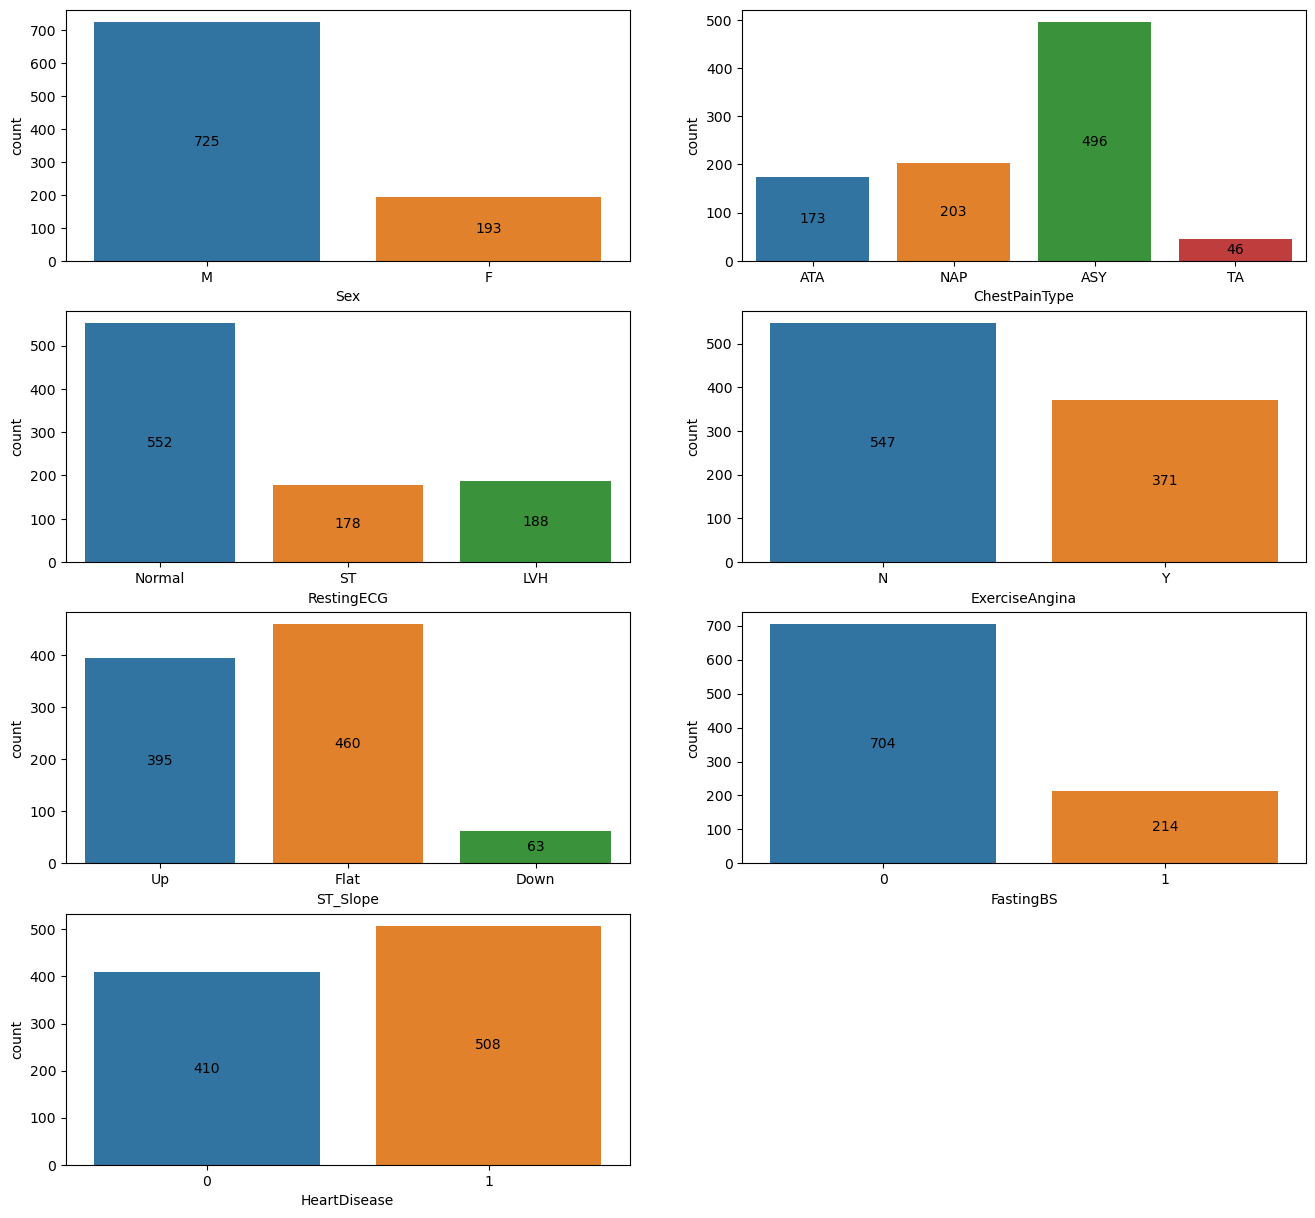

In [15]:
col_c = list(data.dtypes[data.dtypes==object].index)+[ 'FastingBS','HeartDisease']

fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(col_c):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=data[col], ax=ax)
    ax.set_xlabel(col)
    # label
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
    
    
#     for container in ax.containers:
#         ax.bar_label(container, label_type='center')
  

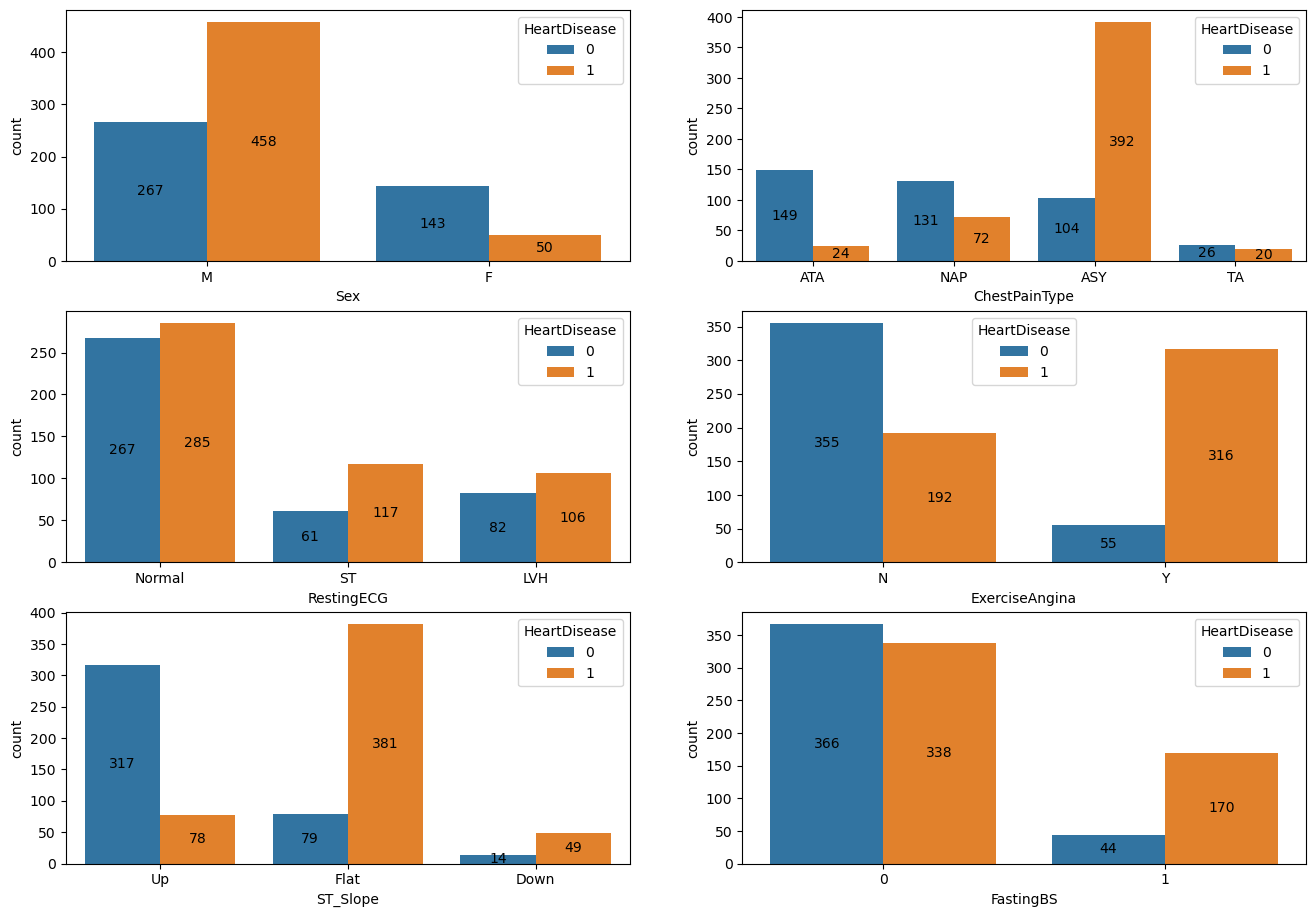

In [16]:
col_c = list(data.dtypes[data.dtypes==object].index)+['FastingBS', 'HeartDisease']

fig = plt.figure(figsize=(16, 15))
for idx, col in enumerate(col_c[:-1]):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=data[col], hue=data['HeartDisease'], ax=ax)
    for container in ax.containers:
        ax.bar_label(container, label_type='center')


In [17]:
median_age = data[data.HeartDisease==1]['Age'].median()
print('The median age of people with heart disease: ', median_age)

The median age of people with heart disease:  57.0


In [18]:
age_male = data[(data.HeartDisease==1) & (data.Sex=='M') & (data.Age>50)].shape[0]
perc = age_male/data[data.HeartDisease==1].shape[0]*100
print(f'The percentage of patients with heart disease are male and over 50 years old is {perc:.2f}%' )

The percentage of patients with heart disease are male and over 50 years old is 67.72%


The ratio of men is about 70%. The ratio of heart disease cases is similar to that without heart disease. People with a chestpain type of ASY, ST slope of flat has a higher chance of heart disease. People with ST slope of up is less likely to have heart disease. The median age of people with heart disease is 57 years old. 67.72% of the patients with heart disease are male with age over 50 years old.

## Data Cleaning
There are no missing data. But some data doesn't make sense and needs to be cleaned up.

In [19]:
# The number of rows, restingBP is zero
sum(data.RestingBP==0)

1

In [20]:
# The numbner of rows Cholesterol is zero
sum(data.Cholesterol==0)

172

In [21]:
data[data.RestingBP==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [22]:
data_1 = data.copy()

In [23]:
median_rbp = data_1[(data_1.ExerciseAngina=='N') & (data_1.RestingECG=='Normal') & (data_1.RestingBP!=0)]['RestingBP'].median()
data_1['RestingBP'] = data_1['RestingBP'].replace(0, median_rbp)

In [25]:
# replace the abnormal value

# find the columns that has higher correlation with cholesterol

data_2 = pd.get_dummies(data=data_1, columns=list(data.dtypes[data.dtypes==object].index), drop_first=True)

corr = abs(data_2.corr()['Cholesterol'])
index = corr.sort_values(ascending=False)[1:5].index
corr_col = []
for item in index:
    if '_' in item: # dummies has _
        item = item.split('_')[0]
    if item in col_c:
        corr_col.append(item)



In [35]:
# Replace the zero values in Cholesterol with median values with high correlation to cholesterol

def replace_value(row):
    val_1 = row[corr_col[0]]
    val_2 = row[corr_col[1]]
    val_3 = row[corr_col[2]]
    median_chol = data_1[data_1.Cholesterol!=0].groupby(corr_col)['Cholesterol'].median()
    if row['Cholesterol']==0:
        row['Cholesterol'] = median_chol[val_1][val_2][val_3] # get the value
    return row


In [37]:
data_1.apply(replace_value, axis=1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [39]:
data_clean = data.copy()
data_clean = data[data.RestingBP!=0]
hd_mask = data_clean['HeartDisease']==0

cholesterol_wo_hd = data_clean.loc[hd_mask, 'Cholesterol']
cholesterol_wt_hd = data_clean.loc[~hd_mask, 'Cholesterol']
data_clean.loc[hd_mask, 'Cholesterol'] = cholesterol_wo_hd.replace(to_replace=0, value=cholesterol_wo_hd.median())
data_clean.loc[~hd_mask, 'Cholesterol'] = cholesterol_wt_hd.replace(to_replace=0, value=cholesterol_wt_hd.median())



In [40]:
data_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


Replace 0 in Chelosterol with the median grouped by the most correlated columns. 

## Feature Selection
Use corr() to find the most correlated features

In [41]:
data_clean = pd.get_dummies(data_clean, drop_first=True)
data_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


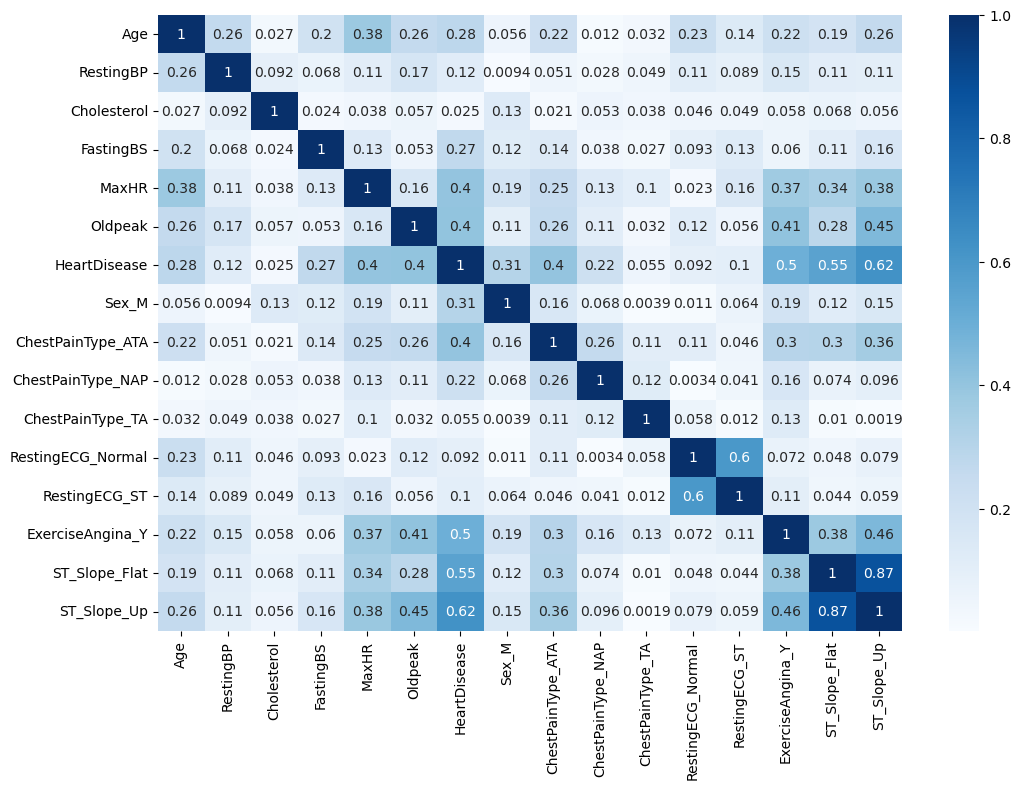

In [43]:
correlations = abs(data_clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap='Blues')
plt.show()

## Building a Classifier I
Use KNeighborClassifier to fit the data, single feature is used for the fit

In [44]:
features = ['Oldpeak', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']
score_feature = {}
X = data_clean.drop(['HeartDisease'], axis=1)
y = data_clean['HeartDisease']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=417)

for feature in features:    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train[[feature]], y_train)
    score_feature[feature] = round(knn.score(X_val[[feature]], y_val)*100, 2)
print(score_feature)    

{'Oldpeak': 58.7, 'Sex_M': 61.59, 'ExerciseAngina_Y': 73.19, 'ST_Slope_Flat': 81.88, 'ST_Slope_Up': 55.07}


The feature Sex_M is an underperforming model. Sex_M is not medical signs. It has such large correlation with hear disease is probably due to the high protion male in the sample.

##  Building a Classifier II
Use multiple features, the values needs to normalzied first

In [47]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features]) # test data use the transform 

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 83.33


The accuracy is similar to the fit with single feature ST_Slope_Up. It suggests UT_Slope_Up is dominant.

## Hyperparameter Tuning
Optimize the hyperparameter

In [54]:
grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
search = knn_grid.fit(X_train_scaled, y_train)

In [55]:
best_score = search.best_score_
best_param = search.best_params_
print(best_param)
print(best_score)

{'metric': 'minkowski', 'n_neighbors': 19}
0.8343507030603805


In [53]:
best_estimator = search.best_estimator_
best_estimator.score(X_val_scaled, y_val)

0.8695652173913043